In [245]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

image_count = 6*8
X = np.zeros((image_count, 92*112))
for i in range(6):
    for j in range(8):
        image = cv.imread(f'images/s{i+1}/{j+1}.pgm', cv.IMREAD_GRAYSCALE)
        image_arr = np.resize(image, (112*92))
        X[6*i+j] = image_arr

mean_face = np.mean(X, axis=0)
for i in range(image_count):
    X[i] -= mean_face

In [246]:
# Transpose to get the correct dimensions
X = X.transpose()
U, S, Vh = np.linalg.svd(X)

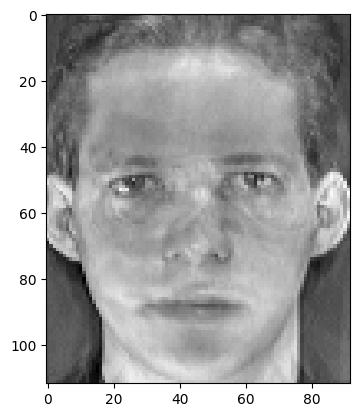

In [252]:
k = 20
U_k = U.copy()
U_k[:, k+1:] = 0
z = U_k.transpose() @ X.transpose()[0]

reconstruct = np.dot(U_k, z)
plt.imshow(reconstruct.reshape((112, 92)), cmap='gray')
plt.show()